In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

## 회귀선이 있는 산점도

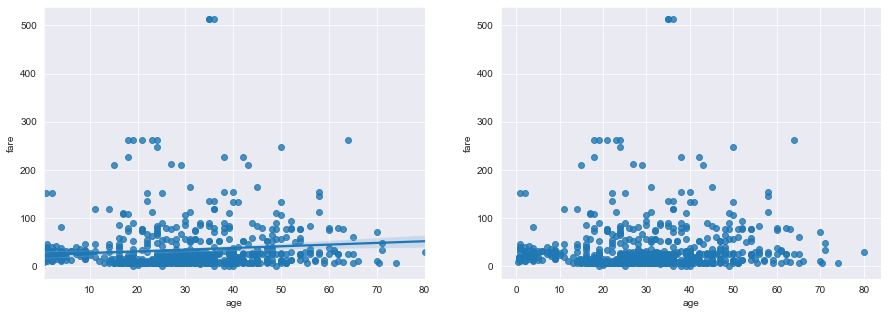

In [5]:
sns.set_style('darkgrid')

fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age',
           y = 'fare',
           data = titanic,
           ax = ax1)

sns.regplot(x='age',
           y = 'fare',
           data = titanic,
           ax = ax2,
           fit_reg = False) # 회귀선 미표시

plt.show()

## 히스토그램/커널 밀도 그래프

C:\Users\khb16\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


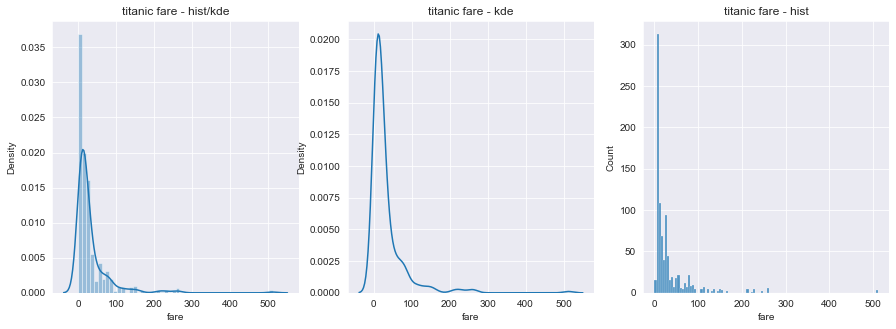

In [7]:
fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax = ax1)

# kdeplot
sns.kdeplot(titanic['fare'], ax = ax2)

# histplot
sns.histplot(titanic['fare'], ax = ax3)

ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')
plt.show()

## 히트맵

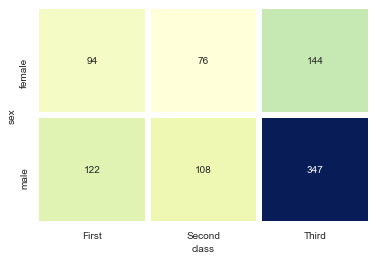

In [8]:
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

sns.heatmap(table,
           annot = True, fmt = 'd', # 데이터 값 표시 여부, 정수형 포맷
           cmap = 'YlGnBu',
           linewidth = 5,
           cbar = False)
plt.show()

## 범주형 데이터의 산점도

C:\Users\khb16\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


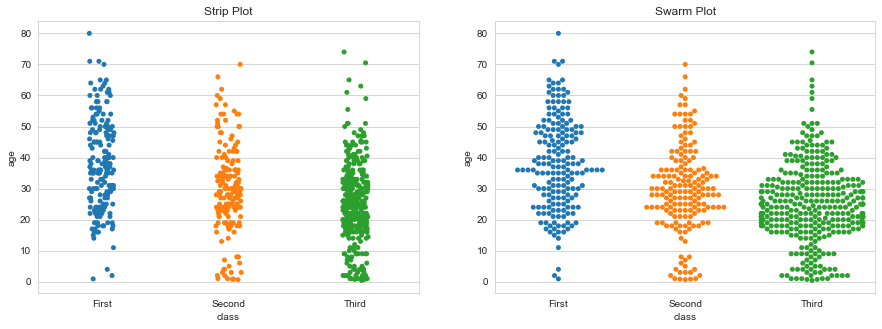

In [9]:
sns.set_style('whitegrid')

fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 o)
sns.stripplot(x='class',
             y='age',
             data = titanic,
             ax=ax1)

# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x='class',
             y='age',
             data = titanic,
             ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')
plt.show()

## 막대 그래프

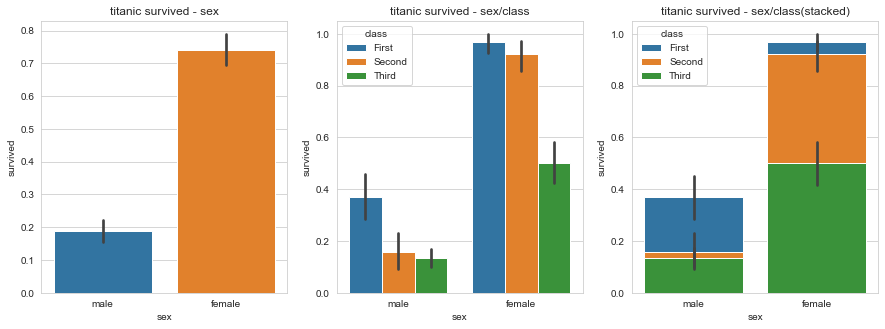

In [12]:
fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived',data=titanic, ax=ax1)

# x축, y축 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived',hue = 'class', data=titanic, ax=ax2)

# x축, y축 변수 할당하고 hue 옵션 추가하여 누적 할당
sns.barplot(x='sex', y='survived',hue = 'class', dodge = False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')
plt.show()

## 빈도 그래프

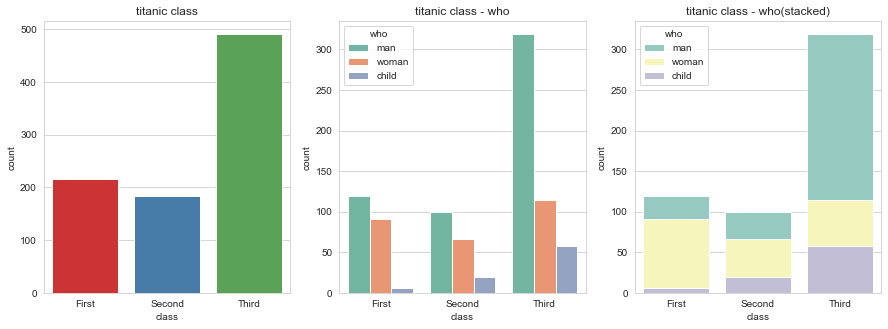

In [15]:
fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette = 'Set1', data = titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue = 'who', palette = 'Set2', data = titanic, ax=ax2)

# dodge = False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')
plt.show()

## 박스 플롯/바이올린 그래프

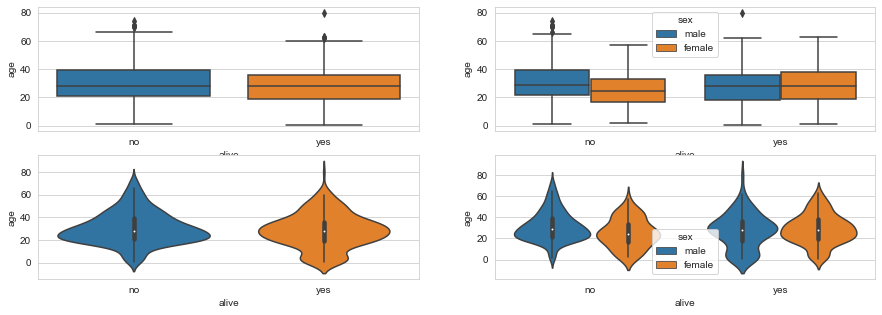

In [17]:
fig  = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age',data=titanic, ax=ax1)

# x축, y축 변수 할당하고 hue 옵션 추가
sns.boxplot(x='alive', y='age', hue = 'sex', data=titanic, ax=ax2)

# 바이올린 그래프
sns.violinplot(x='alive', y='age',data=titanic, ax=ax3)

sns.violinplot(x='alive', y='age', hue = 'sex', data=titanic, ax=ax4)

plt.show()

## 조인트 그래프

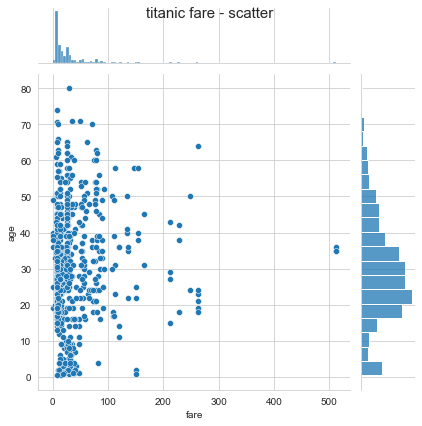

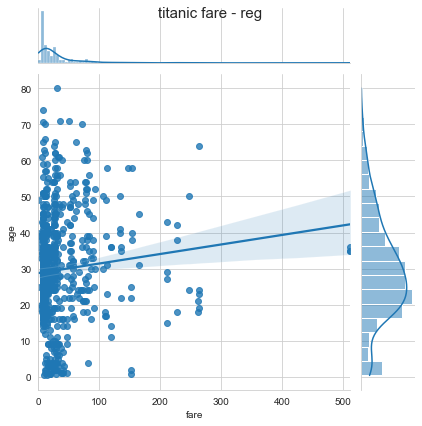

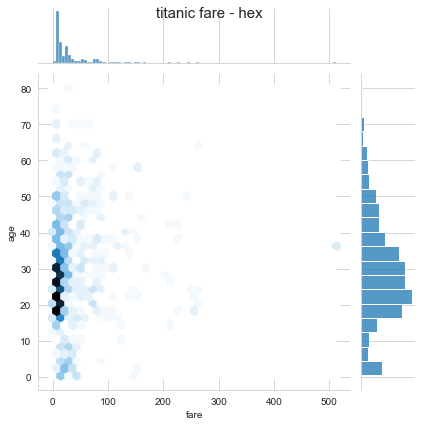

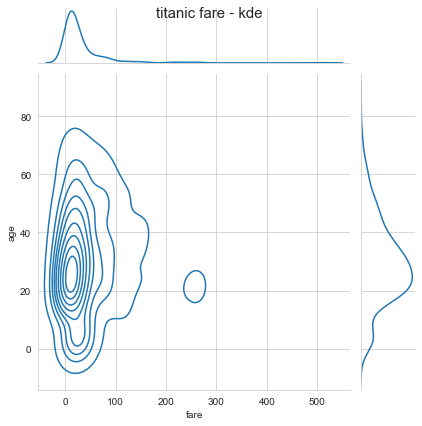

In [19]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind = 'reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3= sns.jointplot(x='fare', y='age', kind = 'hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4= sns.jointplot(x='fare', y='age', kind = 'kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)
plt.show()

## 조건을 적용하여 화면을 그리드로 분할하기

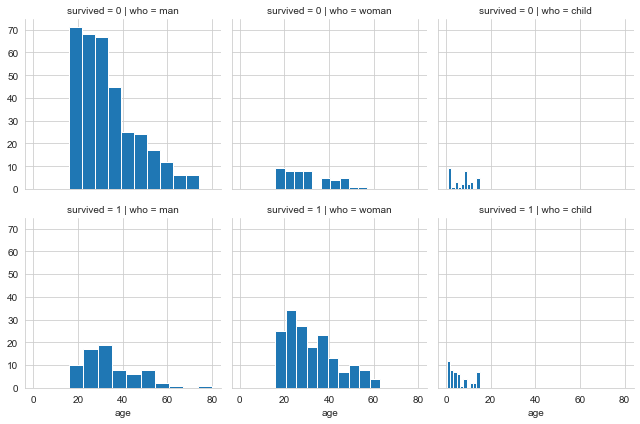

In [20]:
g = sns.FacetGrid(data=titanic, col = 'who', row = 'survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

## 이변수 데이터의 분포

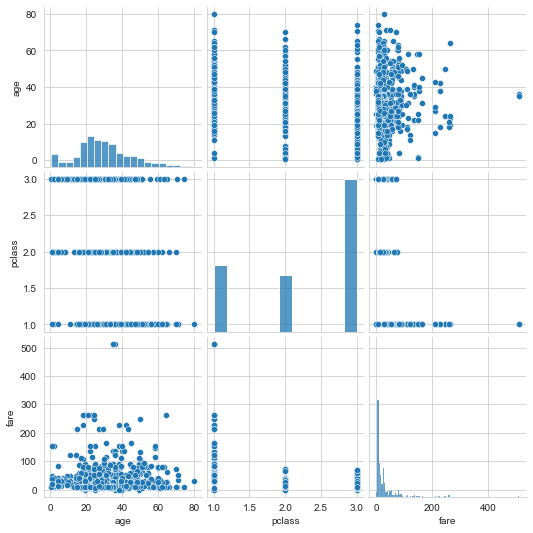

In [21]:
titanic_pair = titanic[['age','pclass','fare']]

g = sns.pairplot(titanic_pair)

## Folium 라이브러리 - 지도 활용

**지도 만들기**

In [23]:
import folium

seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)
seoul_map
# 지도를 HTML 파일로 저장하기
#seoul_map.save('seoul.html')

**지도 스타일 적용하기**

In [24]:
seoul_map2 = folium.Map(location = [37.55, 126.98], titles = 'Stamen Terrain', zoom_start = 12)
seoul_map2

# seoul_map2.save('seoul2.html')

In [25]:
seoul_map3 = folium.Map(location = [37.55, 126.98], titles = 'Stamen Toner', zoom_start = 15) 
seoul_map3
# seoul_map3.save('seoul3.html')

**지도에 마커 표시하기**

In [27]:
df = pd.read_excel('서울지역 대학교 위치.xlsx', engine = 'openpyxl')

# 서울 지도 만들기
seoul_map = folium.Map(location = [37.55, 126.98], titles = 'Stamen Terrain', zoom_start = 12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
seoul_map
#seoul_map.save('seoul_colleges.html')

In [28]:
# 지도에 원형 마커 표시
seoul_map = folium.Map(location = [37.55, 126.98], titles = 'Stamen Terrain', zoom_start = 12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 10,
                        color = 'brown',
                        fill = True,
                        fill_color = 'coral',
                        fill_opacity = 0.7,
                        popup=name).add_to(seoul_map)
seoul_map

#seoul_map.save('seoul_colleges2.html')

**지도 영역에 단계구분도(Choropleth Map) 표시하기**

In [30]:
import json

file_path = '경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col = '구분', engine = 'openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '경기도행정구역경계.json'

try:
    geo_data = json.load(open(geo_path, encoding = 'utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding = 'utf-8-sig'))
    
# 경기도 지도 만들기
g_map = folium.Map(location = [37.5502, 126.982],
                  tiles = 'Stamen Terrain', zoom_start = 9)

# 출력할 연도 선택(2007~2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data = geo_data,
                 data = df[year],
                 columns = [df.index, df[year]],
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                 threshold_scale = [10000, 100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name',
                 ).add_to(g_map)
g_map
# g_map.save('gyonggi_population_'+year+'.html')